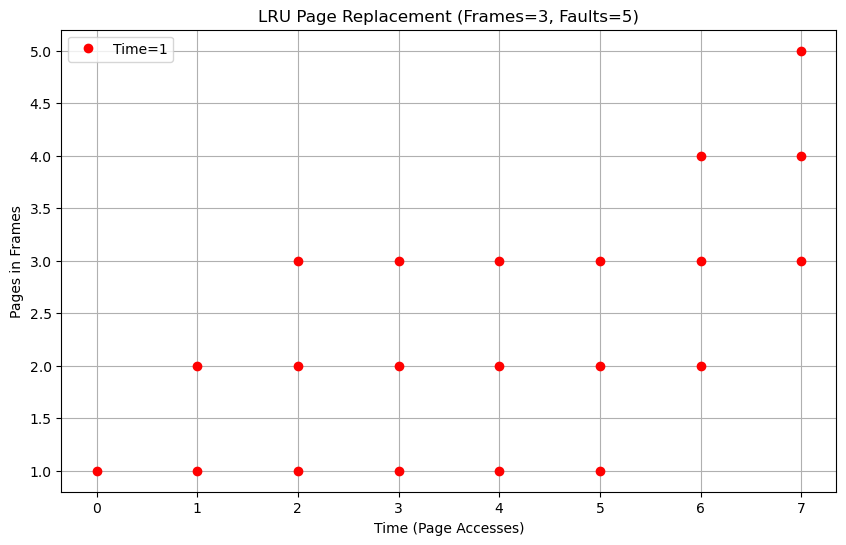

In [2]:
import matplotlib.pyplot as plt
import collections

# Ensure that plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Function to simulate LRU Page Replacement
def lru_page_replacement(frames_count, page_sequence):
    # Initialize the frame to keep track of pages
    frames = []
    page_faults = 0
    frame_history = []  # To store the history of frames for visualization

    # Set to quickly check if a page is already in frames
    frames_set = set()

    # Process each page in the sequence
    for page in page_sequence:
        # If the page is not in the frames, it's a page fault
        if page not in frames_set:
            page_faults += 1
            # If the frame is full, remove the least recently used (LRU) page
            if len(frames) >= frames_count:
                lru_page = frames.pop(0)  # Remove the least recently used page
                frames_set.remove(lru_page)
            # Add the new page to the frames
            frames.append(page)
            frames_set.add(page)
        else:
            # If the page is already in frames, move it to the end (recently used)
            frames.remove(page)
            frames.append(page)

        # Record the current state of frames for visualization
        frame_history.append(list(frames))

    return page_faults, frame_history


# Function to visualize the LRU page replacement process
def visualize_lru(frames_count, page_sequence):
    # Simulate LRU page replacement
    page_faults, frame_history = lru_page_replacement(frames_count, page_sequence)
    
    # Plot the frame history over time
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a time series for each page in the sequence
    for i, frame in enumerate(frame_history):
        ax.plot([i] * len(frame), frame, 'ro', label=f'Time={i+1}' if i == 0 else "")

    ax.set_xlabel('Time (Page Accesses)')
    ax.set_ylabel('Pages in Frames')
    ax.set_title(f'LRU Page Replacement (Frames={frames_count}, Faults={page_faults})')

    # Display the page access sequence along with frame state at each access
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to handle user input
def main():
    # Get user input
    frames_count = int(input("Enter number of frames: "))
    page_sequence = list(map(int, input("Enter page sequence (space-separated): ").split()))

    # Visualize the LRU process
    visualize_lru(frames_count, page_sequence)

# Run the main function
if __name__ == "__main__":
    main()